Iterations: 18
Iterations: 18
Root 1 = 1.040869
Root 2 = 1.969030


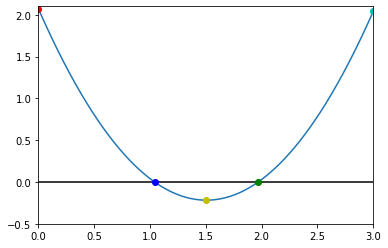

In [56]:
import numpy as num              #imports numpy library
import matplotlib.pyplot as plot #imports Matplotlib's pyplot library

def roots_function(x): #defines function with roots
    a = 1.01;  #initializes a of quadratic function
    b = -3.04; #initializes b of quadratic function
    c = 2.07;  #initializes c of quadratic function
    return a * x ** 2 + b * x + c; #returns result of function

def check_initial_values(func, x_min, x_max, tolr): #defines checker function for initial values of x
    y_min = func(x_min); #acquires result of function with x as x_min
    y_max = func(x_max); #acquires result of function with x as x_max 
    
    if(y_min * y_max >= 0.0):                                          #if results don't cross zero
        print("No zero crossing found in range: ", x_min, x_max);      #prints error message
        sum = "f(%f) = %f, f(%f) = %f" % (x_min, y_min, x_max, y_max); #initializes message with function results
        print(sum);                                                    #prints function results
        return 0;                                                      #returns flag 0
    
    if(num.fabs(y_min) < tolr): #if absolute value of y_min is less than tolerance
        return 1;               #returns flag 1
    
    if(num.fabs(y_max) < tolr): #if absolute value of y_max is less than tolerance
        return 2;               #returns flag 2
    
    return 3; #returns flag 3

def bisection_root_search(func, x_min_start, x_max_start, tolr): #defines bisection search function
    x_min = x_min_start; #stores x_min_start
    x_max = x_max_start; #stores x_max_start
    x_mid = 0.0;         #initializes x_mid
    
    y_min = func(x_min); #acquires result of function with x as x_min 
    y_max = func(x_max); #acquires result of function with x as x_max
    y_mid = 0.0;         #initializes y_mid
    
    max = 10000; #initializes maximum iterations
    i = 0;       #initializes iteration value
    
    flag = check_initial_values(func, x_min, x_max, tolr);        #acquires flag value
    if(flag == 0):                                                #if flag is 0
        print("Error in bisection_root_search()");                #prints error message
        raise ValueError('Initial values invalid', x_min, x_max); #throws a ValueError
    elif(flag == 1):                                              #else if flag is 1
        return x_min;                                             #returns x_min
    elif(flag == 2):                                              #else if flag is 2
        return x_max;                                             #returns x_max
    
    flag = 1;    #sets flag to 1
    while(flag): #while flag is 1
        x_mid = 0.5 * (x_min + x_max); #calculates x_mid
        y_mid = func(x_mid);           #calculates y_mid
        
        if(num.fabs(y_mid) < tolr):            #if absolute value of y_mid is less than tolerance
            flag = 0;                          #sets flag to 0
        else:                                  #else
            if(func(x_min) * func(x_mid) > 0): #if product of mid and end functions is greater than zero
                x_min = x_mid;                 #sets x_min to x_mid
            else:                              #else
                x_max = x_mid;                 #sets x_max to x_mid
                
        i += 1; #increments i by 1
        if(i >= max):                                                  #if i is greater than max iterations
            print("Exceeded maximum number of iterations: ", i);       #prints error message
            sum = "Minimum bracket f(%f) = %f" % (x_min, func(x_min)); #initializes message with min function
            print(sum);                                                #prints min function
            sum = "Maximum bracket f(%f) = %f" % (x_max, func(x_max)); #initializes message with max function
            print(sum);                                                #prints max function
            sum = "Middle bracket f(%f) = %f" % (x_mid, func(x_mid));  #initializes message with mid function
            print(sum);                                                #prints mid function
            raise StopIteration('Stopping iterations after ', i);      #throws StopIteration
         
    print("Iterations: %d" % (i)); #prints total number of iterations
    return x_mid;                  #returns x_mid

x_min = 0.0;  #initializes minimum x-value
x_max = 1.5;  #initializes maximum x-value
tol = 1.0e-6; #initializes tolerance

plot.axhline(y = 0, color = 'k'); #plots x-axis
plot.plot(x, roots_function(x));  #plots function

x1_root = bisection_root_search(roots_function, x_min, x_max, tol); #bisection search for first root
plot.plot(x_min, roots_function(x_min), 'ro');                      #plots lower bracket
plot.plot(x_max, roots_function(x_max), 'yo');                      #plots middle bracket

x_min = 1.5; #initializes minimum x-value to 1.5
x_max = 3.0; #initializes maximum x-value to 3.0

x2_root = bisection_root_search(roots_function, x_min, x_max, tol); #bisection search for second root
plot.plot(x_max, roots_function(x_max), 'co');                      #plots upper bracket

print("Root 1 = %f" % (x1_root)); #prints first root
print("Root 2 = %f" % (x2_root)); #prints second root

x = num.linspace(0, 3, 1000);     #declares array from 0 to 3 with 1000 values

plot.xlim(0, 3);                  #sets x-axis range from 0 to 3
plot.ylim(-0.5, 2.1);             #sets y-axis range from -0.5 to 2.1
plot.plot(x1_root, 0, 'bo');      #plots first root
plot.plot(x2_root, 0, 'go');      #plots second root